# Project Description
Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:
Number of columns: 23


Date  - The date of observation
Location  -The common name of the location of the weather station
MinTemp  -The minimum temperature in degrees celsius
MaxTemp -The maximum temperature in degrees celsius
Rainfall  -The amount of rainfall recorded for the day in mm
Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
Sunshine  -The number of hours of bright sunshine in the day.
WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight
WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
WindDir9am -Direction of the wind at 9am
WindDir3pm -Direction of the wind at 3pm
WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
Humidity9am -Humidity (percent) at 9am
Humidity3pm -Humidity (percent) at 3pm
Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm
Cloud9am - Fraction of sky obscured by cloud at 9am. 
Cloud3pm -Fraction of sky obscured by cloud 
Temp9am-Temperature (degrees C) at 9am
Temp3pm -Temperature (degrees C) at 3pm
RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".


In [53]:
# Basic Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [54]:
df= pd.read_csv('weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [55]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [56]:
df.shape

(145460, 23)

In [57]:
df.drop_duplicates()
df.shape

(145460, 23)

- There are total 23 coluns in the datasets 
- total number of rows ae 1,45,460 in numbers 

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [59]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

- The 16 columns are having float datatype while 7 columns are objec datasets 

In [60]:
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

- There is no single unique value present in the columns 

In [61]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [62]:
# Filling NaN value for catagorical and numerical data by using statistical approach
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp']=df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustDir']=df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindDir9am']=df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm']=df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].mean())

In [63]:
df.isna().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday        3261
RainTomorrow     3267
dtype: int64

In [64]:
df.drop('Date',axis=1, inplace= True)
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.900000,0.6,5.468232,7.611178,W,44.00000,W,WNW,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,Albury,7.4,25.100000,0.0,5.468232,7.611178,WNW,44.00000,NNW,WSW,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,Albury,12.9,25.700000,0.0,5.468232,7.611178,WSW,46.00000,W,WSW,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,Albury,9.2,28.000000,0.0,5.468232,7.611178,NE,24.00000,SE,E,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,Albury,17.5,32.300000,1.0,5.468232,7.611178,W,41.00000,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.400000,0.0,5.468232,7.611178,E,31.00000,SE,ENE,...,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,No,No
145456,Uluru,3.6,25.300000,0.0,5.468232,7.611178,NNW,22.00000,SE,N,...,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,No,No
145457,Uluru,5.4,26.900000,0.0,5.468232,7.611178,N,37.00000,SE,WNW,...,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,No,No
145458,Uluru,7.8,27.000000,0.0,5.468232,7.611178,SE,28.00000,SSE,N,...,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,No,No


In [65]:
df.nunique()

Location          49
MinTemp          390
MaxTemp          506
Rainfall         682
Evaporation      359
Sunshine         146
WindGustDir       16
WindGustSpeed     68
WindDir9am        16
WindDir3pm        16
WindSpeed9am      44
WindSpeed3pm      45
Humidity9am      102
Humidity3pm      102
Pressure9am      547
Pressure3pm      550
Cloud9am          11
Cloud3pm          11
Temp9am          442
Temp3pm          503
RainToday          2
RainTomorrow       2
dtype: int64

In [66]:
catagorical_data=[]
numerical_data=[]
for i in df.columns:
    if df[i].dtype=='object':
        catagorical_data.append(i)
    else:
        numerical_data.append(i)
print('Catagorical Data= ', catagorical_data)
print('Numerical Data= ', numerical_data)

Catagorical Data=  ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
Numerical Data=  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [67]:
numerical_data=df[{'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'}]
numerical_data.head()

,Humidity3pm,Cloud9am,Temp9am,MaxTemp,Sunshine,Cloud3pm,Pressure3pm,WindGustSpeed,WindSpeed3pm,WindSpeed9am,Humidity9am,Evaporation,Pressure9am,MinTemp,Rainfall,Temp3pm
0,22.0,8.000000,16.9,22.9,7.611178,4.50993,1007.1,44.0,24.0,20.0,71.0,5.468232,1007.7,13.4,0.6,21.8
1,25.0,4.447461,17.2,25.1,7.611178,4.50993,1007.8,44.0,22.0,4.0,44.0,5.468232,1010.6,7.4,0.0,24.3
2,30.0,4.447461,21.0,25.7,7.611178,2.00000,1008.7,46.0,26.0,19.0,38.0,5.468232,1007.6,12.9,0.0,23.2
3,16.0,4.447461,18.1,28.0,7.611178,4.50993,1012.8,24.0,9.0,11.0,45.0,5.468232,1017.6,9.2,0.0,26.5
4,33.0,7.000000,17.8,32.3,7.611178,8.00000,1006.0,41.0,20.0,7.0,82.0,5.468232,1010.8,17.5,1.0,29.7


In [68]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.649940,1015.255889,4.447461,4.509930,16.990631,21.683390
std,6.365750,7.088124,8.382488,3.161541,2.729486,13.118253,8.861059,8.716581,18.854765,20.471189,6.728467,6.663973,2.265604,2.092954,6.449221,6.850057
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.700000,18.000000,0.000000,4.000000,7.611178,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,3.000000,4.000000,12.300000,16.700000
50%,12.100000,22.700000,0.000000,5.468232,7.611178,39.000000,13.000000,18.662657,69.000000,51.539116,1017.649940,1015.255889,4.447461,4.509930,16.800000,21.400000
75%,16.800000,28.200000,1.000000,5.468232,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


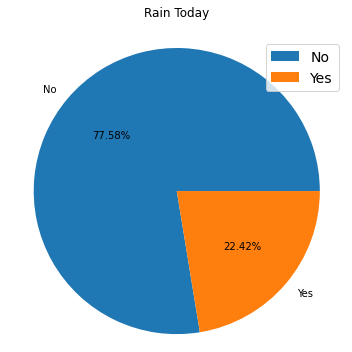

In [69]:
plt.figure(figsize=(5,5))
plt.pie(df['RainToday'].value_counts(), labels= df['RainToday'].value_counts().index, autopct='%1.2f%%')
plt.title('Rain Today\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

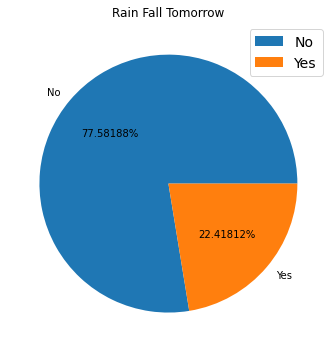

In [70]:
plt.figure(figsize=(5,5))
plt.pie(df['RainTomorrow'].value_counts(), labels=df['RainTomorrow'].value_counts().index, autopct='%1.5f%%')
plt.title('Rain Fall Tomorrow')
plt.legend(prop={'size':14})
plt.tight_layout()
plt.show()

# Univariant Analysis

<AxesSubplot:xlabel='Evaporation', ylabel='Density'>

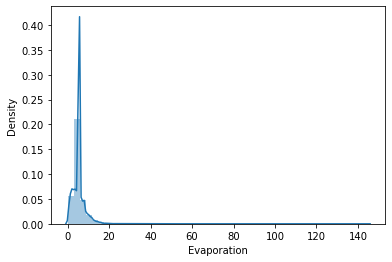

In [71]:
sns.distplot(df['Evaporation'])

<AxesSubplot:xlabel='MaxTemp', ylabel='Density'>

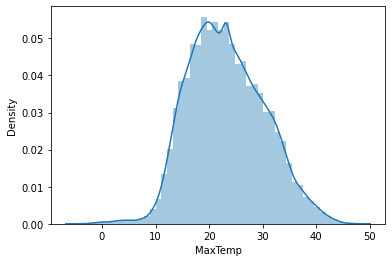

In [72]:
sns.distplot(df['MaxTemp'])

<AxesSubplot:xlabel='MinTemp', ylabel='Density'>

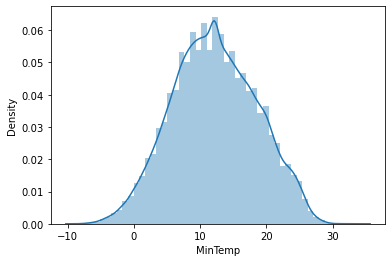

In [73]:
sns.distplot(df['MinTemp'])

<AxesSubplot:xlabel='WindGustDir', ylabel='count'>

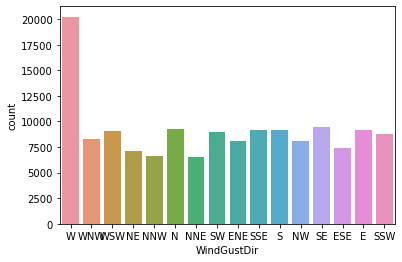

In [74]:
sns.countplot(df['WindGustDir'])

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

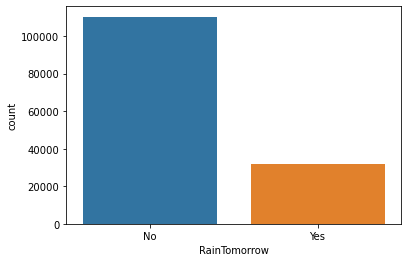

In [75]:
sns.countplot(df['RainTomorrow'])

<AxesSubplot:xlabel='RainToday', ylabel='count'>

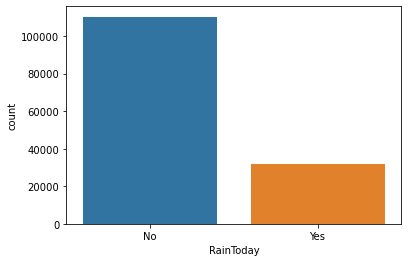

In [76]:
sns.countplot(df['RainToday'])

<AxesSubplot:xlabel='Humidity9am', ylabel='Density'>

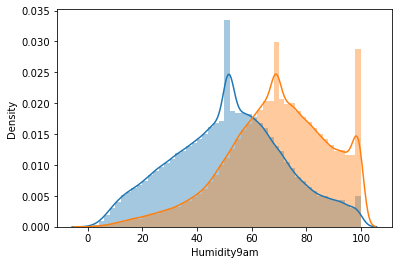

In [77]:
sns.distplot(df['Humidity3pm'])
sns.distplot(df['Humidity9am'])

<AxesSubplot:xlabel='Pressure9am', ylabel='Density'>

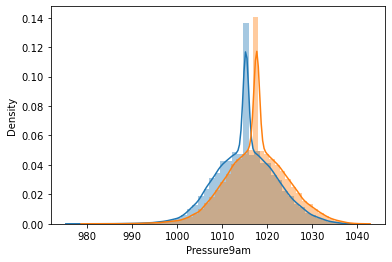

In [78]:
sns.distplot(df['Pressure3pm'])
sns.distplot(df['Pressure9am'])

<AxesSubplot:xlabel='WindGustSpeed', ylabel='Density'>

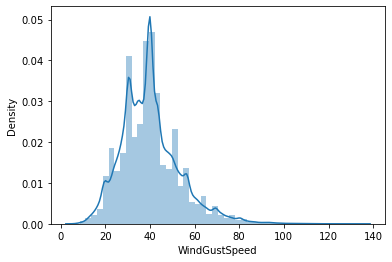

In [79]:
sns.distplot(df['WindGustSpeed'])

In [80]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

# Bivariant Analysis

<AxesSubplot:xlabel='MinTemp', ylabel='Evaporation'>

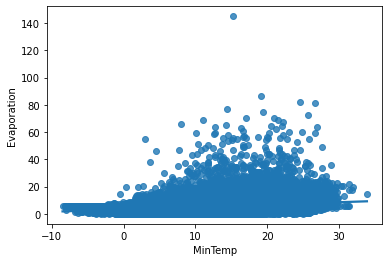

In [81]:
sns.regplot(x= df['MinTemp'],y=df['Evaporation'], data=df)

<AxesSubplot:xlabel='MaxTemp', ylabel='Evaporation'>

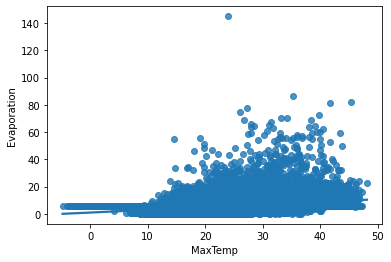

In [82]:
sns.regplot(x= df['MaxTemp'],y=df['Evaporation'], data=df)

<AxesSubplot:xlabel='Cloud9am', ylabel='Temp9am'>

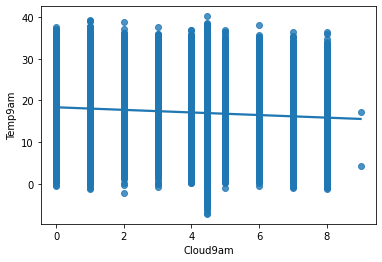

In [83]:
sns.regplot(data=df,x='Cloud9am', y='Temp9am')#, hue='RainToday')

<AxesSubplot:xlabel='WindGustDir', ylabel='count'>

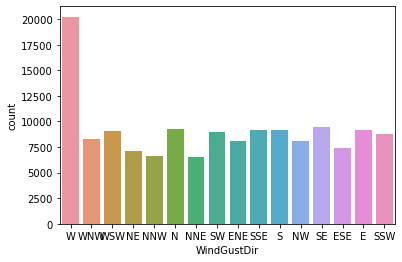

In [84]:
sns.countplot(data=df,x='WindGustDir')

<AxesSubplot:xlabel='WindDir3pm', ylabel='count'>

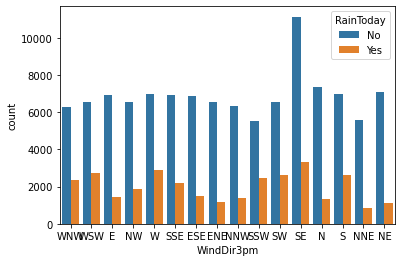

In [85]:
sns.countplot(data= df,x ='WindDir3pm', hue='RainToday')

<AxesSubplot:xlabel='WindDir3pm', ylabel='count'>

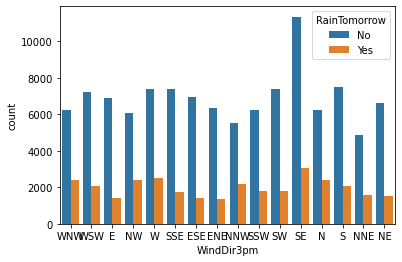

In [86]:
sns.countplot(data= df,x ='WindDir3pm', hue='RainTomorrow')

<AxesSubplot:xlabel='MinTemp', ylabel='MaxTemp'>

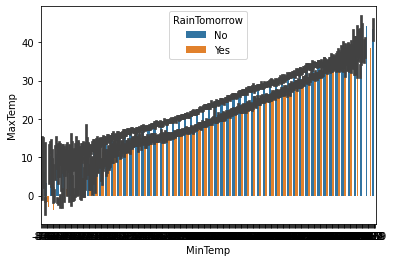

In [87]:
sns.barplot(data=df, x='MinTemp', y='MaxTemp', hue='RainTomorrow')

<AxesSubplot:xlabel='Evaporation', ylabel='RainToday'>

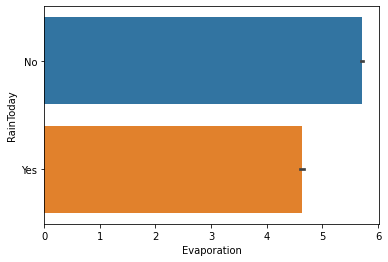

In [88]:
sns.barplot(data=df, x='Evaporation', y= df['RainToday'])

<AxesSubplot:xlabel='Rainfall', ylabel='RainToday'>

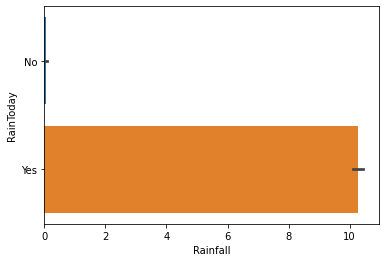

In [89]:
sns.barplot(x=df['Rainfall'],y=df['RainToday'])

<AxesSubplot:xlabel='MinTemp', ylabel='RainToday'>

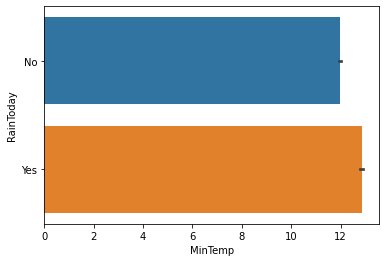

In [90]:
sns.barplot(x=df['MinTemp'],y=df['RainToday'])

<AxesSubplot:xlabel='MaxTemp', ylabel='RainToday'>

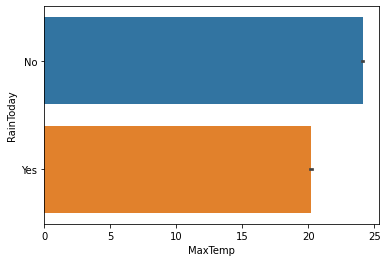

In [91]:
sns.barplot(x=df['MaxTemp'],y=df['RainToday'])

<AxesSubplot:xlabel='MinTemp', ylabel='RainTomorrow'>

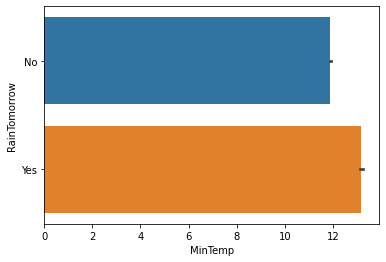

In [92]:
sns.barplot(x=df['MinTemp'],y=df['RainTomorrow'])

<AxesSubplot:xlabel='MaxTemp', ylabel='RainTomorrow'>

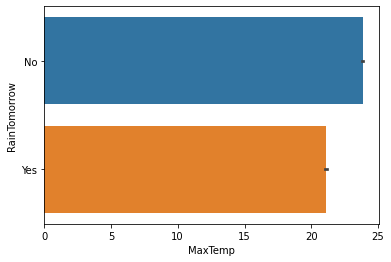

In [93]:
sns.barplot(x=df['MaxTemp'],y=df['RainTomorrow'])

<AxesSubplot:xlabel='Sunshine', ylabel='RainTomorrow'>

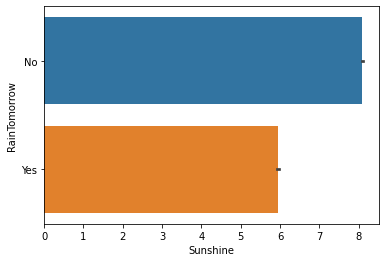

In [94]:
sns.barplot(x=df['Sunshine'],y=df['RainTomorrow'])

<AxesSubplot:xlabel='Sunshine', ylabel='RainToday'>

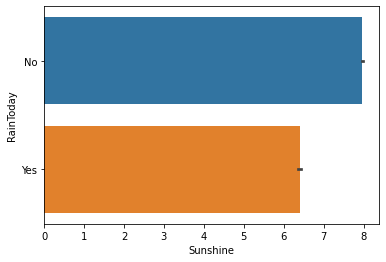

In [95]:
sns.barplot(x=df['Sunshine'],y=df['RainToday'])

In [96]:
df.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

<AxesSubplot:xlabel='WindGustSpeed', ylabel='RainTomorrow'>

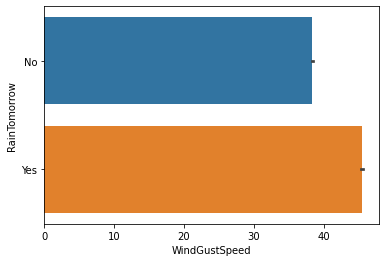

In [97]:
sns.barplot(x=df['WindGustSpeed'],y=df['RainTomorrow'])

<AxesSubplot:xlabel='Sunshine', ylabel='WindGustSpeed'>

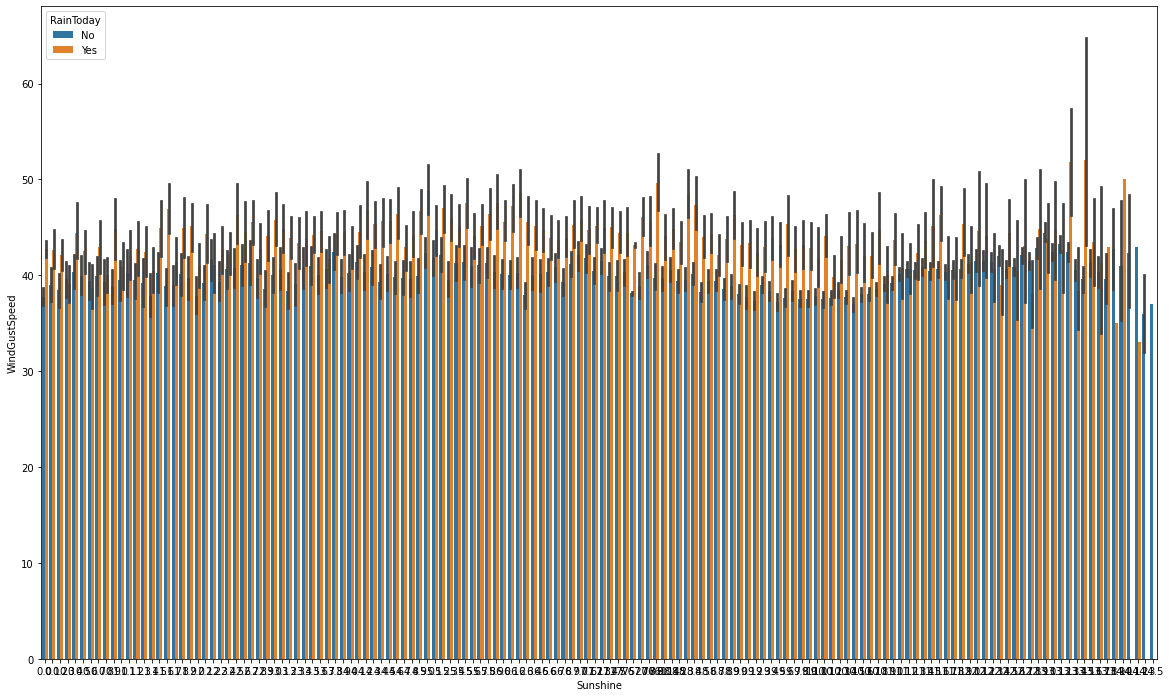

In [98]:
plt.figure(figsize=(20,12))
sns.barplot(x=df['Sunshine'],y=df['WindGustSpeed'], hue=df['RainToday'])

<AxesSubplot:xlabel='Sunshine', ylabel='MinTemp'>

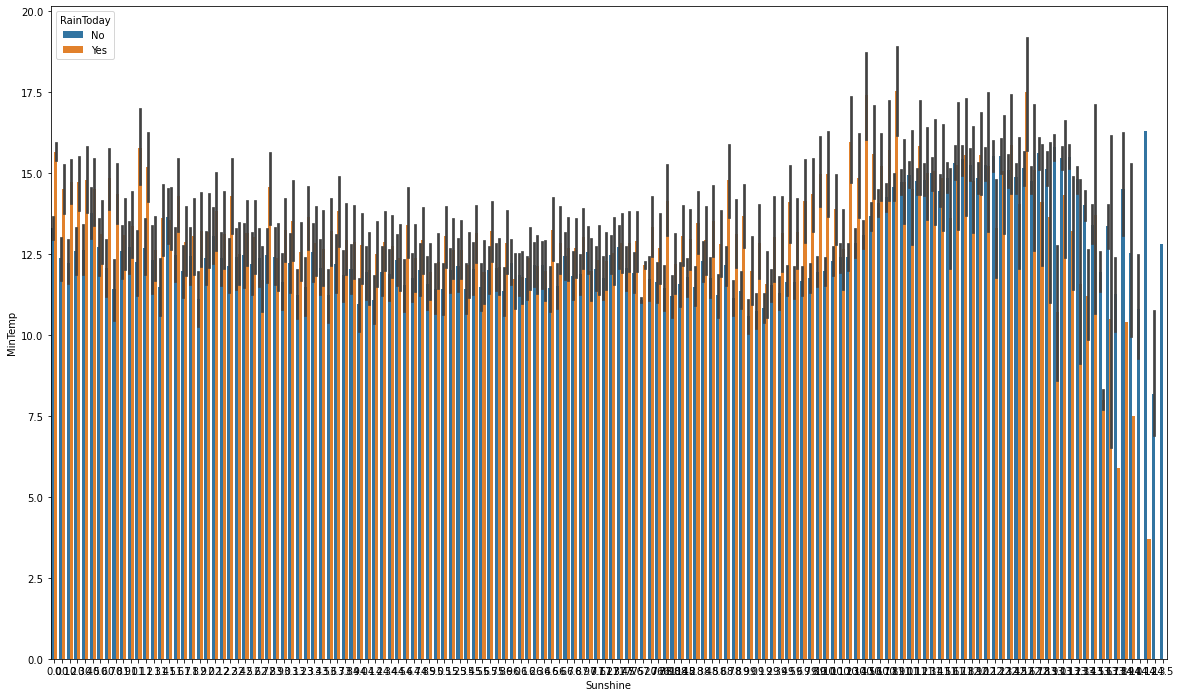

In [99]:
plt.figure(figsize=(20,12))
sns.barplot(x=df['Sunshine'],y=df['MinTemp'], hue=df['RainToday'])

<AxesSubplot:xlabel='MinTemp', ylabel='count'>

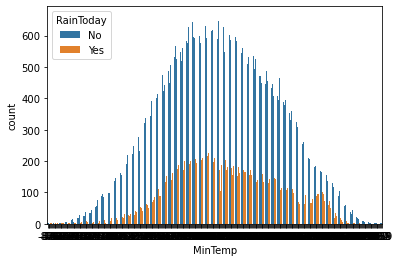

In [100]:
sns.countplot(x=df['MinTemp'], hue=df['RainToday'])

<AxesSubplot:xlabel='Cloud9am', ylabel='RainToday'>

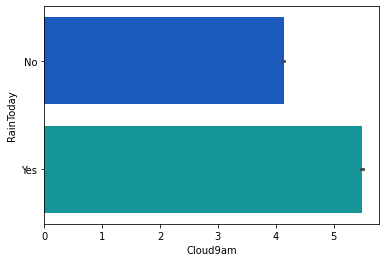

In [101]:
sns.barplot(x=df['Cloud9am'], y=df['RainToday'], palette= 'winter')

<AxesSubplot:xlabel='MinTemp', ylabel='MaxTemp'>

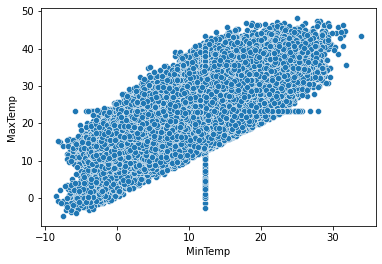

In [102]:
sns.scatterplot(x='MinTemp',y='MaxTemp', data=df)

ValueError: could not convert string to float: 'Albury'

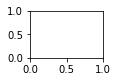

In [103]:
plot=1
for i in df.columns:
    if plot<20:
        plt.subplot(4,4,plot)
        sns.distplot(df[i])
plt+=1
plt.tight_layout()
plt.show()

# Encoding the Data

In [104]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No


In [105]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
col=('Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow')
for i in col:
    df[i]=le.fit_transform(df[i])

In [106]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,22.9,0.6,5.468232,7.611178,13,44.0,13,14,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
1,2,7.4,25.1,0.0,5.468232,7.611178,14,44.0,6,15,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2,2,12.9,25.7,0.0,5.468232,7.611178,15,46.0,13,15,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
3,2,9.2,28.0,0.0,5.468232,7.611178,4,24.0,9,0,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
4,2,17.5,32.3,1.0,5.468232,7.611178,13,41.0,1,7,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0


In [107]:
df.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.00000,145460.000000,145460.000000,145460.000000,...,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,23.793524,12.194034,23.221348,2.360918,5.468232,7.611178,8.09360,40.035230,6.999526,7.798852,...,68.880831,51.539116,1017.649940,1015.255889,4.447461,4.509930,16.990631,21.683390,0.264004,0.264066
std,14.228687,6.365750,7.088124,8.382488,3.161541,2.729486,4.69411,13.118253,4.515839,4.538135,...,18.854765,20.471189,6.728467,6.663973,2.265604,2.092954,6.449221,6.850057,0.489024,0.489138
min,0.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,0.00000,6.000000,0.000000,0.000000,...,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,0.000000
25%,11.000000,7.700000,18.000000,0.000000,4.000000,7.611178,4.00000,31.000000,3.000000,4.000000,...,57.000000,37.000000,1013.500000,1011.100000,3.000000,4.000000,12.300000,16.700000,0.000000,0.000000
50%,24.000000,12.100000,22.700000,0.000000,5.468232,7.611178,9.00000,39.000000,7.000000,8.000000,...,69.000000,51.539116,1017.649940,1015.255889,4.447461,4.509930,16.800000,21.400000,0.000000,0.000000
75%,36.000000,16.800000,28.200000,1.000000,5.468232,8.700000,13.00000,46.000000,11.000000,12.000000,...,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000,0.000000,0.000000
max,48.000000,33.900000,48.100000,371.000000,145.000000,14.500000,15.00000,135.000000,15.000000,15.000000,...,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,2.000000,2.000000


In [108]:
df.corr()['RainTomorrow'].sort_values()

Sunshine        -0.282399
Pressure9am     -0.197383
Pressure3pm     -0.180523
Temp3pm         -0.161030
MaxTemp         -0.135709
Evaporation     -0.075818
Temp9am         -0.019689
Location         0.010202
WindDir9am       0.029188
WindDir3pm       0.033564
WindGustDir      0.070676
MinTemp          0.074267
WindSpeed3pm     0.082503
WindSpeed9am     0.091805
WindGustSpeed    0.200939
Rainfall         0.202978
Humidity9am      0.220421
Cloud9am         0.222693
Cloud3pm         0.259794
Humidity3pm      0.377098
RainToday        0.404622
RainTomorrow     1.000000
Name: RainTomorrow, dtype: float64

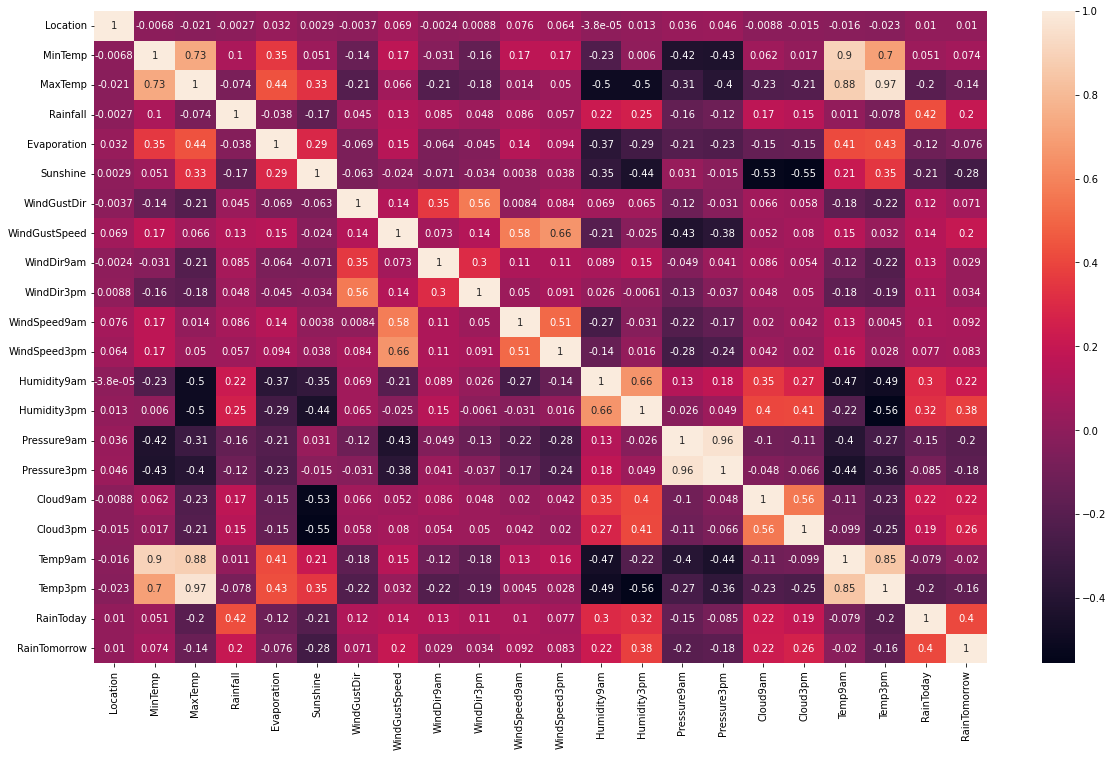

In [109]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot= True)
plt.show()

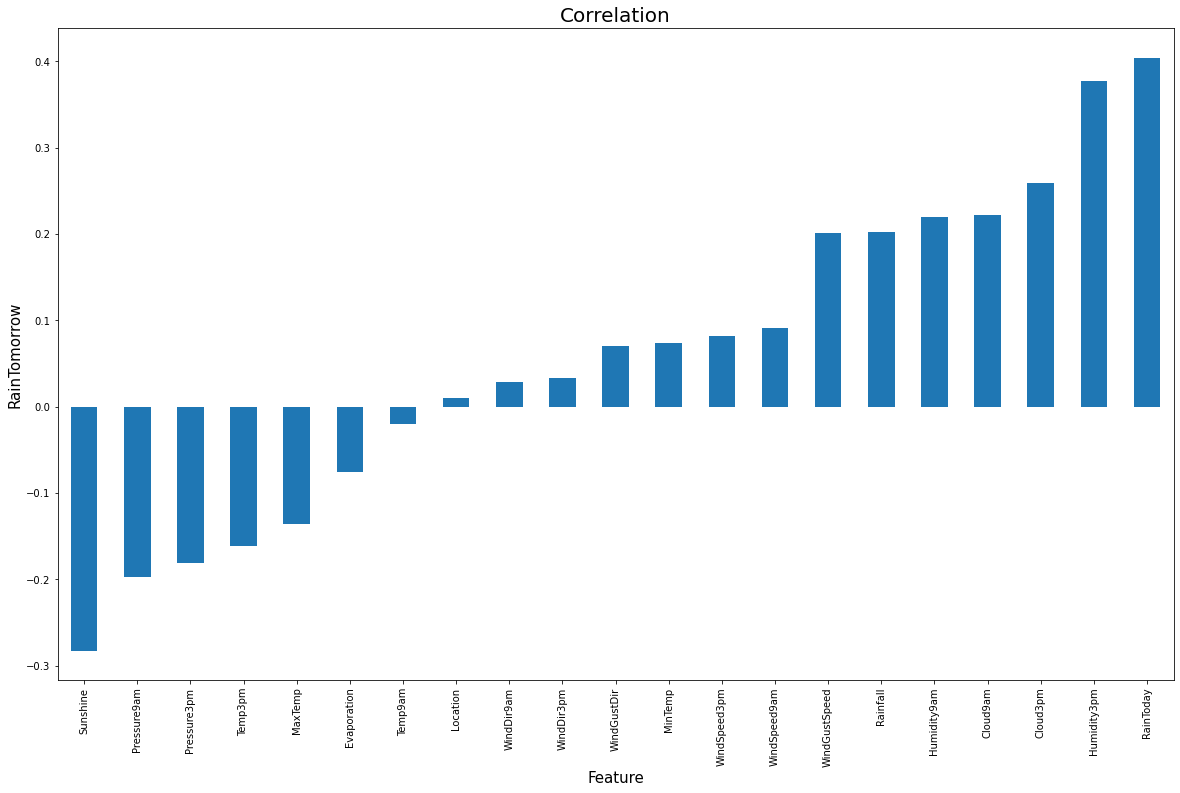

In [110]:
plt.figure(figsize=(20,12))
df.corr()['RainTomorrow'].sort_values(ascending=True).drop(['RainTomorrow']).plot(kind='bar')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('RainTomorrow', fontsize=15)
plt.title('Correlation', fontsize=20)
plt.show()

# Checking Distribution Data

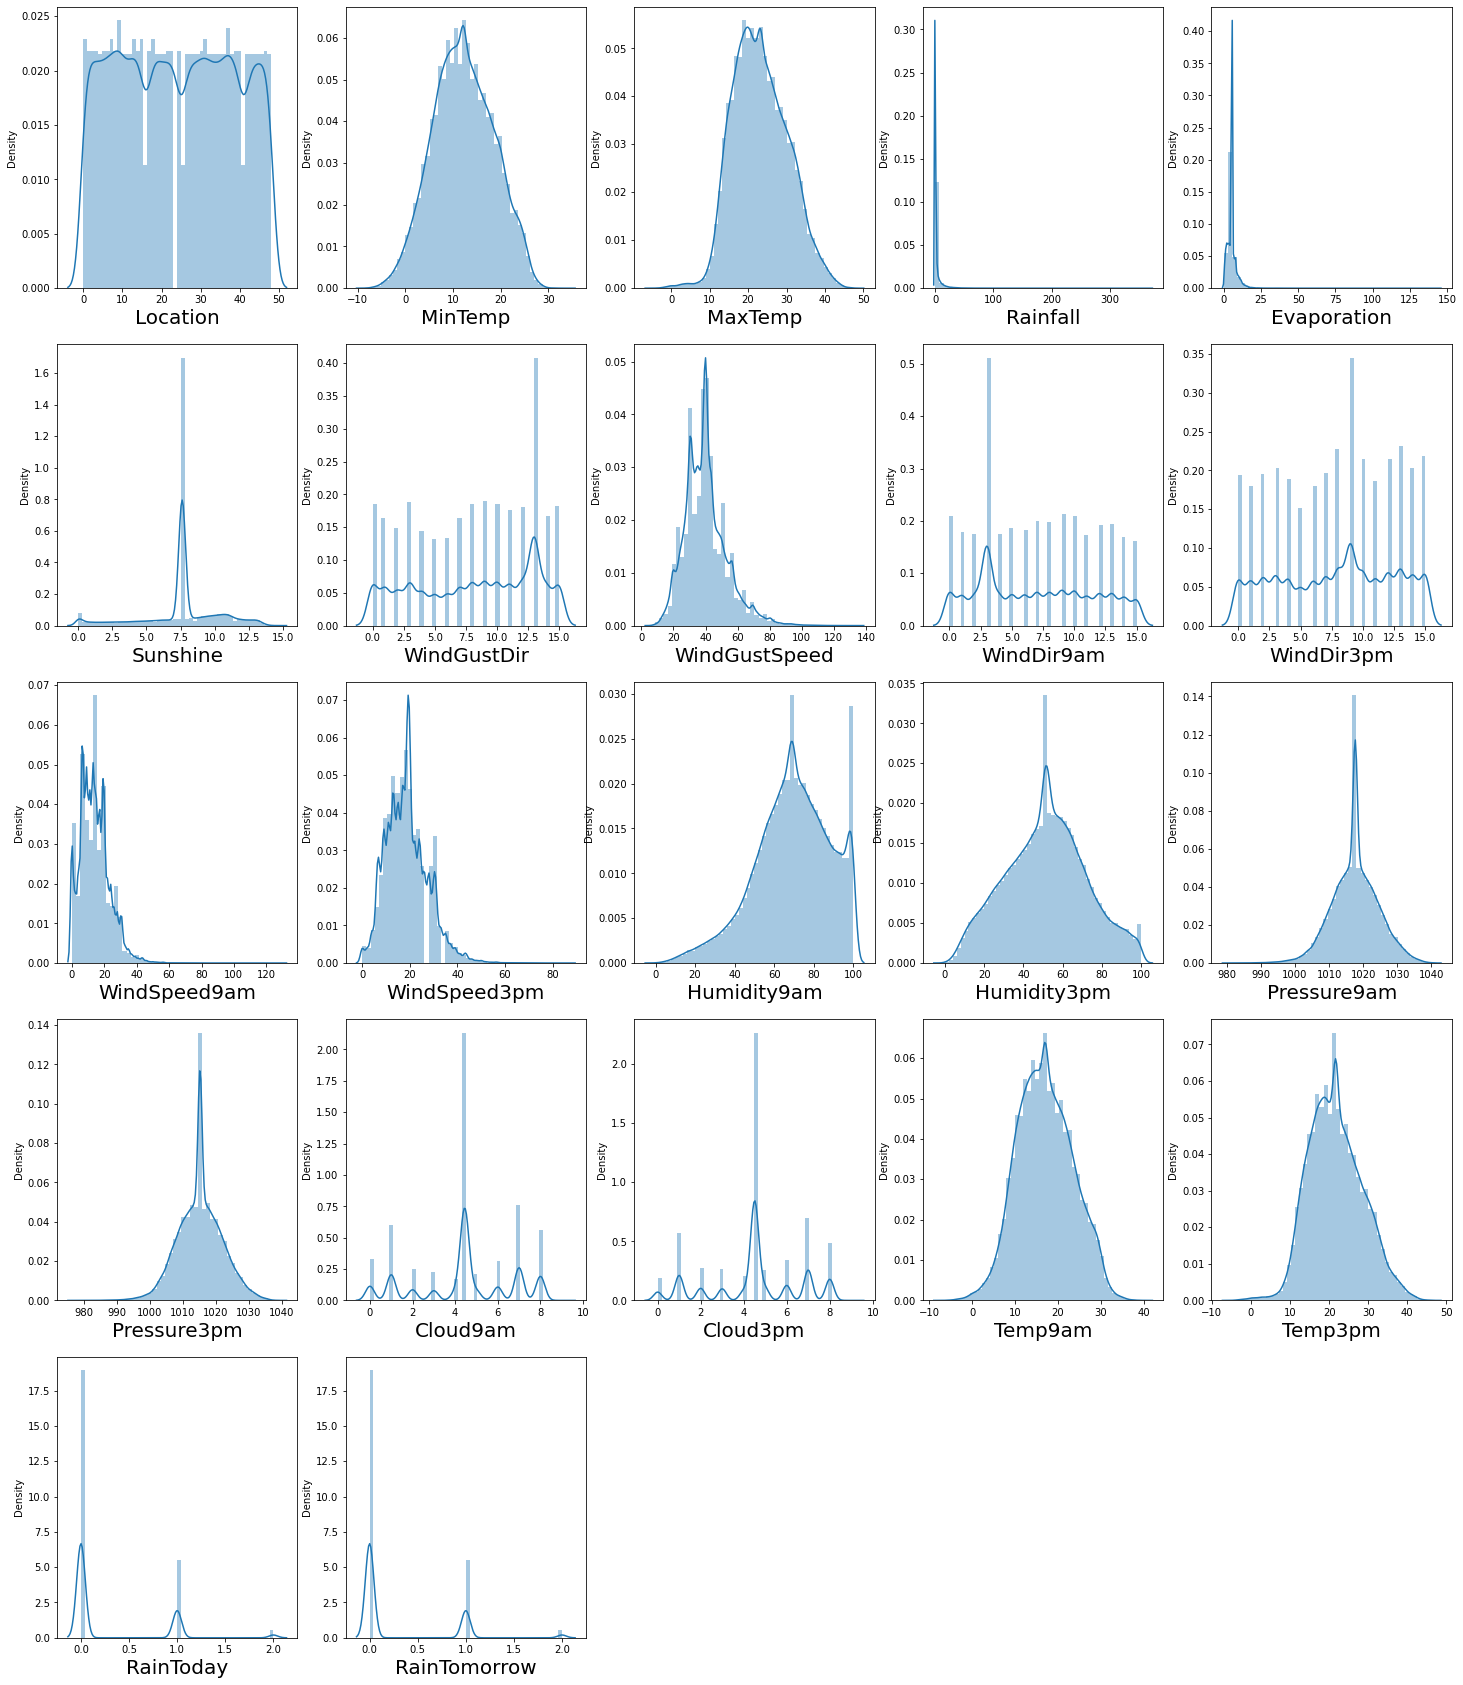

In [111]:
plt.figure(figsize=(25,30))
plotnumber = 1

for column in df:
    if plotnumber <=25:
        ax = plt.subplot(5,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()

In [112]:
df.skew()

Location         0.015406
MinTemp          0.021297
MaxTemp          0.221803
Rainfall         9.948369
Evaporation      4.989198
Sunshine        -0.688552
WindGustDir     -0.233645
WindGustSpeed    0.907477
WindDir9am       0.174355
WindDir3pm      -0.117402
WindSpeed9am     0.782396
WindSpeed3pm     0.634934
Humidity9am     -0.488445
Humidity3pm      0.034148
Pressure9am     -0.100891
Pressure3pm     -0.048178
Cloud9am        -0.291926
Cloud3pm        -0.294245
Temp9am          0.089083
Temp3pm          0.240968
RainToday        1.630771
RainTomorrow     1.631027
dtype: float64

### Checking Outliears 

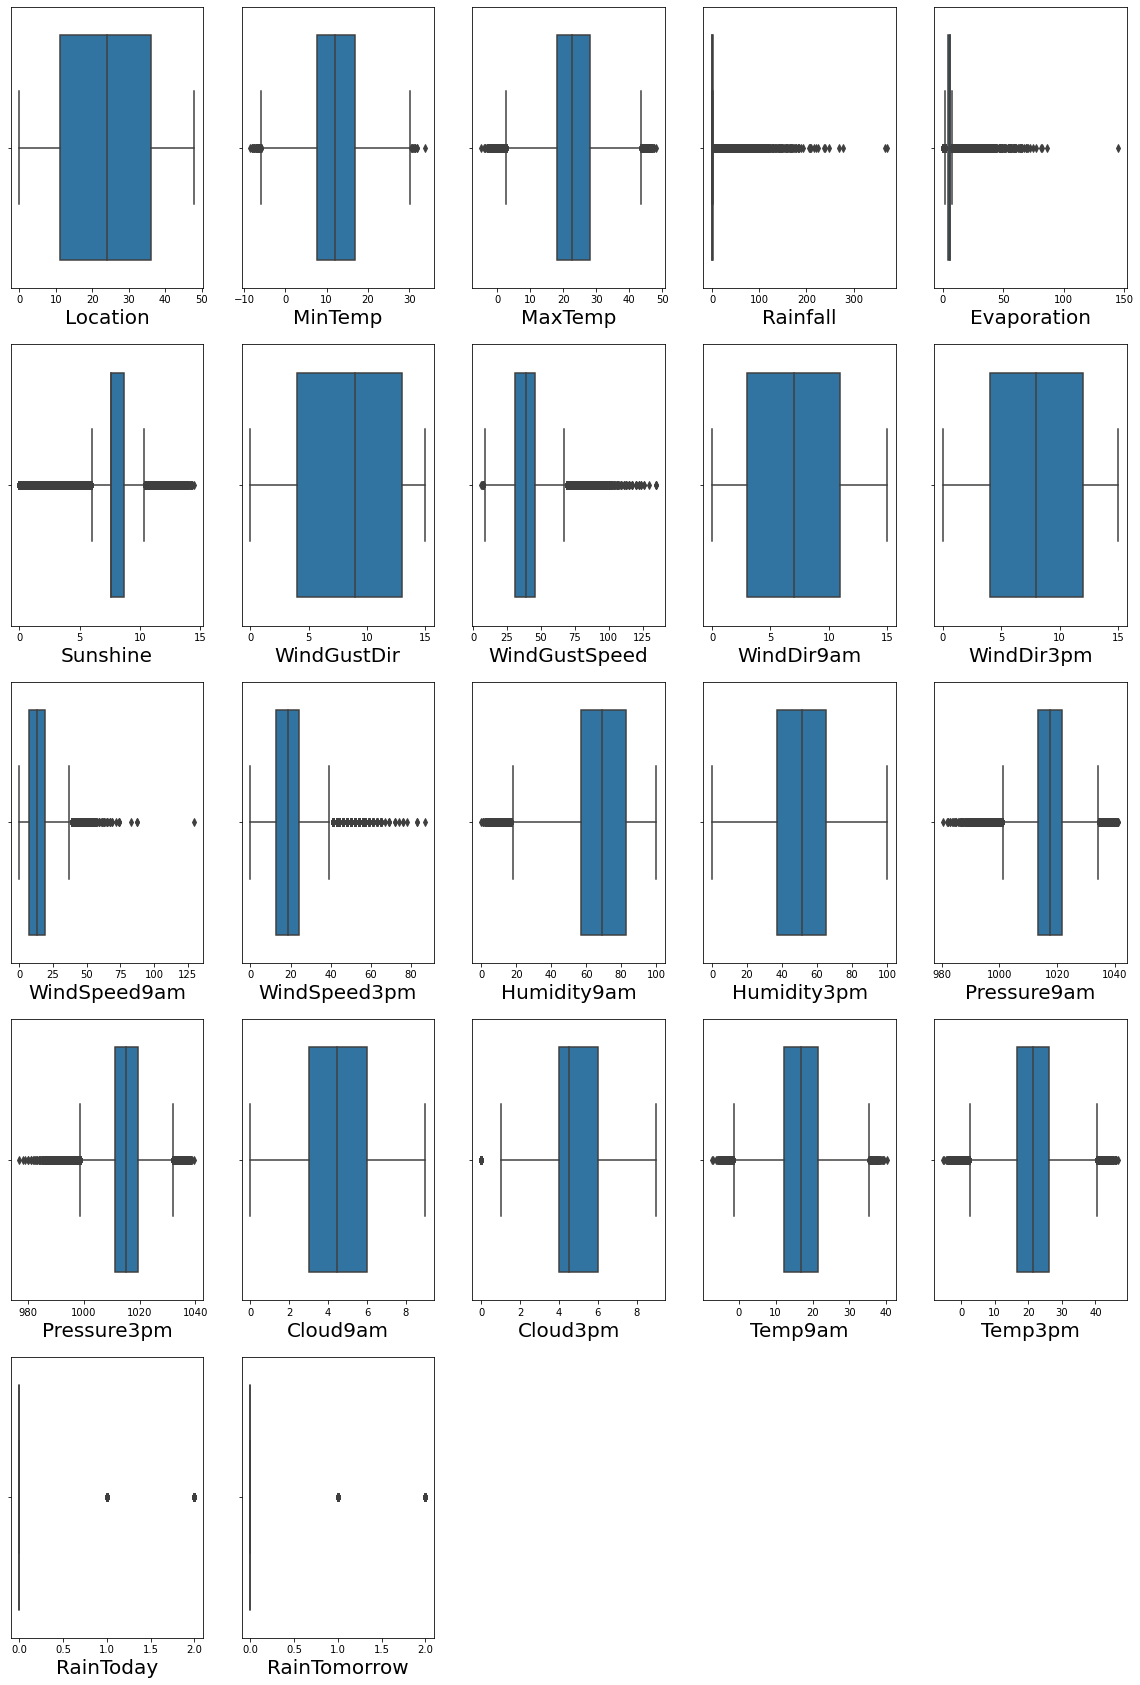

In [113]:
plt.figure(figsize=(20,30))
plotno=1
for i in df:
    if plotno<25:
        plt.subplot(5,5,plotno)
        ax= sns.boxplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotno+=1
plt.show()
    

In [114]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1.531666,0.189447,4.533631e-02,0.210072,2.809331e-16,1.952415e-15,1.045228,0.302234,1.328766,1.366458,...,0.112395,1.442965,1.478788,1.223882,1.568037e+00,8.487347e-16,0.014053,0.017023,0.53986,0.539861
1,1.531666,0.753101,2.650431e-01,0.281650,2.809331e-16,1.952415e-15,1.258262,0.302234,0.221338,1.586813,...,1.319609,1.296417,1.047782,1.118839,3.920285e-16,8.487347e-16,0.032464,0.381985,0.53986,0.539861
2,1.531666,0.110901,3.496920e-01,0.281650,2.809331e-16,1.952415e-15,1.471296,0.454694,1.328766,1.586813,...,1.637832,1.052171,1.493650,0.983784,3.920285e-16,1.199232e+00,0.621685,0.221402,0.53986,0.539861
3,1.531666,0.470337,6.741796e-01,0.281650,2.809331e-16,1.952415e-15,0.872075,1.222364,0.442992,1.718521,...,1.266572,1.736061,0.007422,0.368534,3.920285e-16,8.487347e-16,0.172017,0.703151,0.53986,0.539861
4,1.531666,0.833521,1.280830e+00,0.162353,2.809331e-16,1.952415e-15,1.045228,0.073544,1.328556,0.176032,...,0.695804,0.905623,1.018057,1.388949,1.126652e+00,1.667539e+00,0.125499,1.170302,0.53986,0.539861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,1.209285,1.475720,2.520446e-02,0.281650,2.809331e-16,1.952415e-15,1.724209,0.688755,0.442992,1.498165,...,0.948349,1.345267,1.032937,0.756925,3.920285e-16,8.487347e-16,1.068448,0.104614,0.53986,0.539861
145456,1.209285,1.350047,2.932594e-01,0.281650,2.809331e-16,1.952415e-15,0.446007,1.374824,0.442992,1.057454,...,0.683163,1.491815,0.869452,0.576852,3.920285e-16,8.487347e-16,0.944401,0.411182,0.53986,0.539861
145457,1.209285,1.067283,5.189899e-01,0.281650,2.809331e-16,1.952415e-15,1.085108,0.231375,0.442992,1.366458,...,0.842274,1.345267,0.497895,0.231711,3.920285e-16,8.487347e-16,0.696308,0.644757,0.53986,0.539861
145458,1.209285,0.690264,5.330980e-01,0.281650,2.809331e-16,1.952415e-15,0.193094,0.917445,0.664436,1.057454,...,0.948349,1.345267,0.260099,0.186693,6.388874e-01,1.199232e+00,0.293158,0.630159,0.53986,0.539861


In [115]:
df_z=df[(z<3).all(axis=1)]
df_z

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,22.9,0.6,5.468232,7.611178,13,44.0,13,14,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
1,2,7.4,25.1,0.0,5.468232,7.611178,14,44.0,6,15,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2,2,12.9,25.7,0.0,5.468232,7.611178,15,46.0,13,15,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
3,2,9.2,28.0,0.0,5.468232,7.611178,4,24.0,9,0,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
4,2,17.5,32.3,1.0,5.468232,7.611178,13,41.0,1,7,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,41,3.5,21.8,0.0,5.468232,7.611178,0,31.0,2,0,...,59.0,27.0,1024.7,1021.2,4.447461,4.50993,9.4,20.9,0,0
145455,41,2.8,23.4,0.0,5.468232,7.611178,0,31.0,9,1,...,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,0,0
145456,41,3.6,25.3,0.0,5.468232,7.611178,6,22.0,9,3,...,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,0,0
145457,41,5.4,26.9,0.0,5.468232,7.611178,3,37.0,9,14,...,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,0,0


In [116]:
print('percentage of dataloss = ',((df.shape[0]-df_z.shape[0])/df.shape[0])*100)

percentage of dataloss =  9.10215866904991


# Feature Importance

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 

In [118]:
x= df_z.iloc[:,:-2]
x

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2,13.4,22.9,0.6,5.468232,7.611178,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8
1,2,7.4,25.1,0.0,5.468232,7.611178,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3
2,2,12.9,25.7,0.0,5.468232,7.611178,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2
3,2,9.2,28.0,0.0,5.468232,7.611178,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5
4,2,17.5,32.3,1.0,5.468232,7.611178,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,41,3.5,21.8,0.0,5.468232,7.611178,0,31.0,2,0,15.0,13.0,59.0,27.0,1024.7,1021.2,4.447461,4.50993,9.4,20.9
145455,41,2.8,23.4,0.0,5.468232,7.611178,0,31.0,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4
145456,41,3.6,25.3,0.0,5.468232,7.611178,6,22.0,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5
145457,41,5.4,26.9,0.0,5.468232,7.611178,3,37.0,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1


In [119]:
y=df_z.iloc[:,-1]
y

0         0
1         0
2         0
3         0
4         0
         ..
145454    0
145455    0
145456    0
145457    0
145458    0
Name: RainTomorrow, Length: 132220, dtype: int32

,Importance
Features,
Humidity3pm,0.264
Pressure3pm,0.069
WindGustSpeed,0.065
Sunshine,0.047
Humidity9am,0.046
MinTemp,0.046
Pressure9am,0.044
Rainfall,0.041
Temp9am,0.041


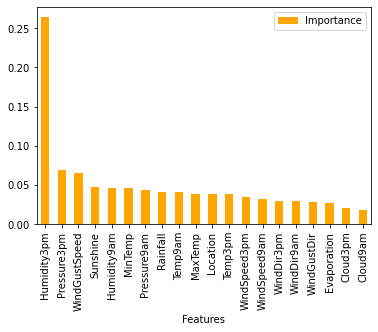

In [120]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=21)
#x_train.shape,x_test.shape,y_train.shape,y_test.shape
rf= RandomForestRegressor()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
importance=pd.DataFrame({'Features':x.columns, 'Importance':np.round(rf.feature_importances_,3)})
importance=importance.sort_values('Importance', ascending= False).set_index('Features')
importance.plot.bar(color='orange')
importance

# Correlation of features

In [121]:
df_corr=df_z.corr()

<AxesSubplot:>

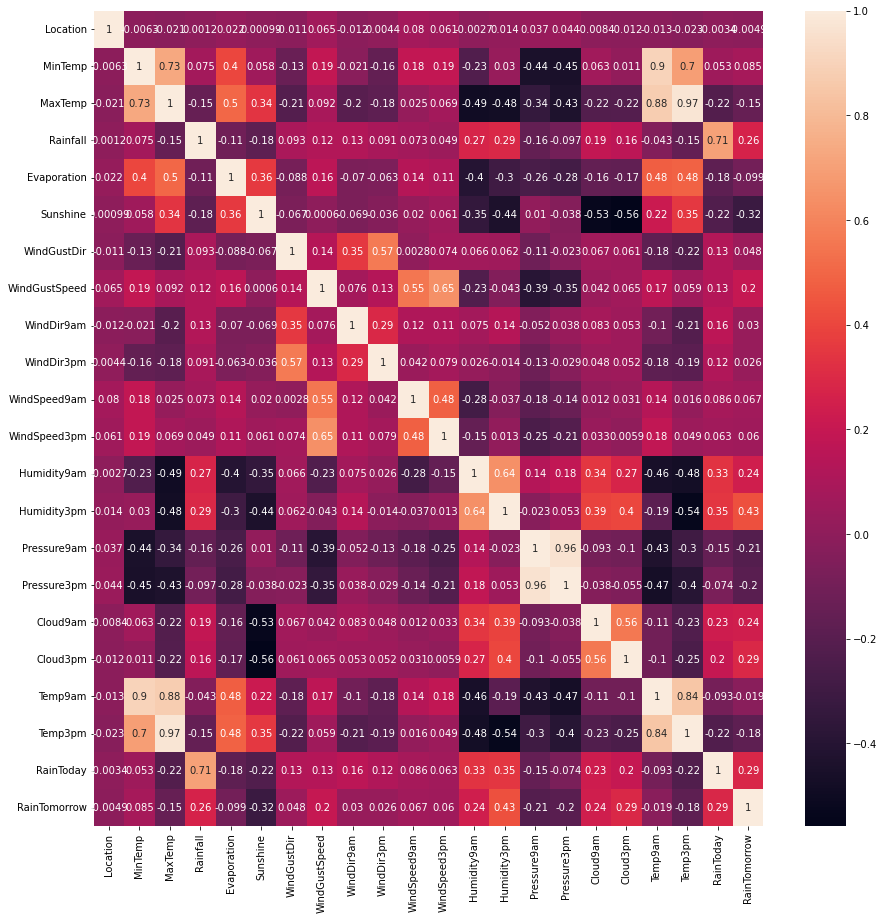

In [122]:
plt.figure(figsize=(15,15))
sns.heatmap(df_corr,annot=True)

In [123]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler
scaler=StandardScaler()
x_scaler=scaler.fit_transform(numerical_data)
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(x_scaler,i) for i in range(x_scaler.shape[1])]
vif["feature"]=numerical_data.columns
vif

,value,feature
0,5.077638,Humidity3pm
1,1.769502,Cloud9am
2,18.044476,Temp9am
3,21.579654,MaxTemp
4,1.819188,Sunshine
5,1.764819,Cloud3pm
6,16.440174,Pressure3pm
7,2.395668,WindGustSpeed
8,1.940659,WindSpeed3pm
9,1.799998,WindSpeed9am


- If VIF > 10, It means multicollinearity is present.
- MultiCollinearity are exists in  Pressure9am, Pressure3pm, MaxTemp, Temp9am and Temp3pm. Based on ANOVA F scores

In [124]:
df.drop(columns=['MaxTemp','Pressure9am','Pressure3pm','Temp9am','Temp3pm'],axis=1,inplace=True)

In [125]:
df.head()

,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,2,13.4,0.6,5.468232,7.611178,13,44.0,13,14,20.0,24.0,71.0,22.0,8.000000,4.50993,0,0
1,2,7.4,0.0,5.468232,7.611178,14,44.0,6,15,4.0,22.0,44.0,25.0,4.447461,4.50993,0,0
2,2,12.9,0.0,5.468232,7.611178,15,46.0,13,15,19.0,26.0,38.0,30.0,4.447461,2.00000,0,0
3,2,9.2,0.0,5.468232,7.611178,4,24.0,9,0,11.0,9.0,45.0,16.0,4.447461,4.50993,0,0
4,2,17.5,1.0,5.468232,7.611178,13,41.0,1,7,7.0,20.0,82.0,33.0,7.000000,8.00000,0,0


In [126]:
x = df.drop(columns=['RainTomorrow'],axis=1)
y = df['RainTomorrow']

In [127]:
df.shape

(145460, 17)

In [128]:
df_z.shape

(132220, 22)

In [129]:
loss=((df.shape[0]-df_z.shape[0])/df.shape[0])*100
print("% of data lost = ", loss)

% of data lost =  9.10215866904991


In [130]:
df['RainTomorrow'].value_counts()

0    110316
1     31877
2      3267
Name: RainTomorrow, dtype: int64

In [131]:
df_z.skew()

Location         0.007474
MinTemp          0.055103
MaxTemp          0.255474
Rainfall         3.675241
Evaporation      0.657511
Sunshine        -0.693531
WindGustDir     -0.213742
WindGustSpeed    0.486553
WindDir9am       0.169653
WindDir3pm      -0.102474
WindSpeed9am     0.450495
WindSpeed3pm     0.374397
Humidity9am     -0.396720
Humidity3pm      0.049408
Pressure9am      0.067034
Pressure3pm      0.095529
Cloud9am        -0.282955
Cloud3pm        -0.286807
Temp9am          0.105679
Temp3pm          0.268776
RainToday        1.449935
RainTomorrow     1.439089
dtype: float64

In [132]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(x)

In [133]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier

In [134]:
from imblearn.over_sampling import SMOTE as sm

smt_x,smt_y = sm().fit_resample(x,y)

In [135]:
smt_y.value_counts()

0    110316
1    110316
2    110316
Name: RainTomorrow, dtype: int64

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(smt_x,smt_y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.6737472931459939 on Random_state 42


In [137]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve,auc

In [138]:
KNN=KNeighborsClassifier(n_neighbors=6)
DT=DecisionTreeClassifier(random_state=6)
#XGB=XGBClassifier()
RF=RandomForestClassifier()
ADA=AdaBoostClassifier()
MNB=MultinomialNB()
GBC=GradientBoostingClassifier()
BC=BaggingClassifier()
ETC=ExtraTreesClassifier()
LR=LogisticRegression()

models= []
models.append(('KNeighborsClassifier', KNN))
models.append(('DecisionTreeClassifier', DT))
#models.append(('XGBClassifier', XGB))
models.append(('RandomForestClassifier', RF))
models.append(('AdaBoostClassifier', ADA))
#models.append(('MultinomialNB', MNB))
models.append(('GradientBoostingClassifier', GBC))
models.append(('BaggingClassifier', BC))
models.append(('ExtraTreesClassifier', ETC))
models.append(('LogisticRegression', LR))

****************************************** KNeighborsClassifier ********************************************************


KNeighborsClassifier(n_neighbors=6)


Accuracy_score =  0.845888166187667


Cross_Val_Score =  0.841577119913009


roc_auc_score =  0.6805677569957009


classification_report
               precision    recall  f1-score   support

           0       0.86      0.96      0.91     31428
           1       0.74      0.40      0.52      8238

    accuracy                           0.85     39666
   macro avg       0.80      0.68      0.71     39666
weighted avg       0.83      0.85      0.83     39666



[[30276  1152]
 [ 4961  3277]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



****************************************** DecisionTreeClassifier ********************************************************


DecisionTreeClassifier(random_state=6)


Accuracy_score =  0.7889124186961125


Cross_Val_Score =  0.784424992064512


roc_auc_score =  0.6864864983243355


classificat

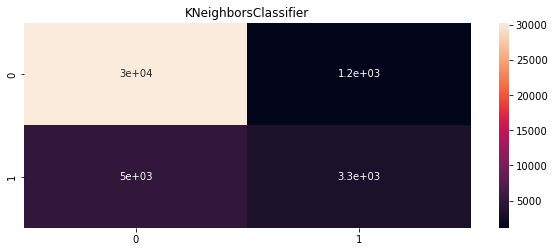

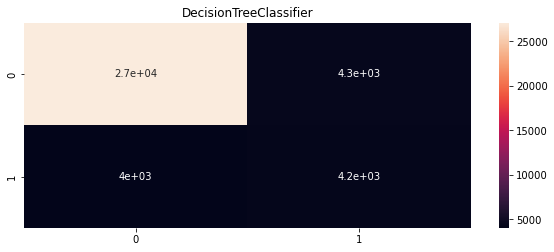

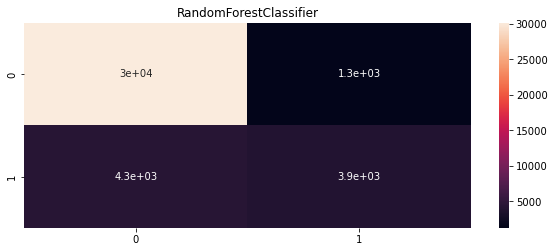

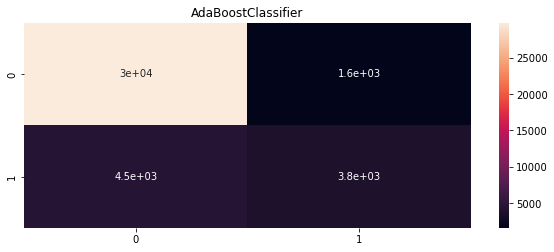

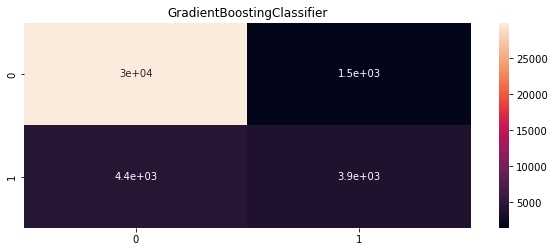

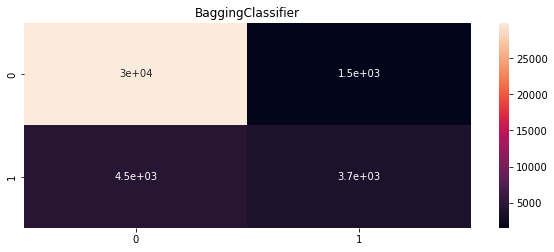

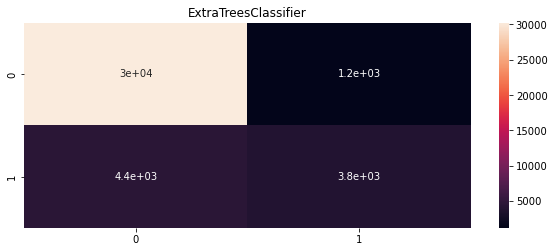

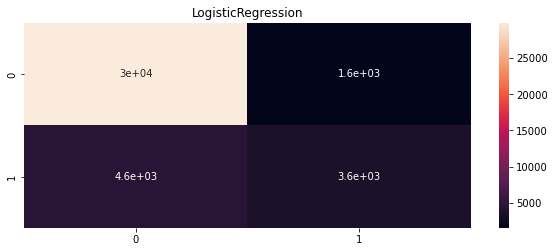

In [139]:
Model= []
score= []
cvs=[]
rocscore=[]
difference=[]
for name,model in models:
    print('******************************************',name,'********************************************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    
    sc= cross_val_score(model, x_test,y_test, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    
    false_positive_rate, true_positive_rate,thresolds= roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score = ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    print('\n\n')
    diff=AS-sc
    difference.append(diff)

In [140]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score,'Cross_val_score': cvs,'difference between a and c':difference,'roc_score':rocscore})
result

,Model,Accuracy_score,Cross_val_score,difference between a and c,roc_score
0,KNeighborsClassifier,84.588817,84.157712,4.311046e-03,68.056776
1,DecisionTreeClassifier,78.891242,78.442499,4.487427e-03,68.648650
2,RandomForestClassifier,85.972873,85.398095,5.747790e-03,71.908401
3,AdaBoostClassifier,84.672011,84.724964,-5.295238e-04,70.326132
4,GradientBoostingClassifier,85.226642,85.226658,-1.566468e-07,71.079203
5,BaggingClassifier,84.757727,84.359433,3.982941e-03,70.210041
6,ExtraTreesClassifier,85.836737,85.246823,5.899135e-03,71.182065
7,LogisticRegression,84.404780,84.377052,2.772811e-04,69.508111


AxesSubplot(0.125,0.808774;0.62x0.0712264)



AxesSubplot(0.125,0.808774;0.62x0.0712264)



AxesSubplot(0.125,0.808774;0.62x0.0712264)



AxesSubplot(0.125,0.808774;0.62x0.0712264)



AxesSubplot(0.125,0.808774;0.62x0.0712264)



AxesSubplot(0.125,0.808774;0.62x0.0712264)



AxesSubplot(0.125,0.808774;0.62x0.0712264)



AxesSubplot(0.125,0.808774;0.62x0.0712264)





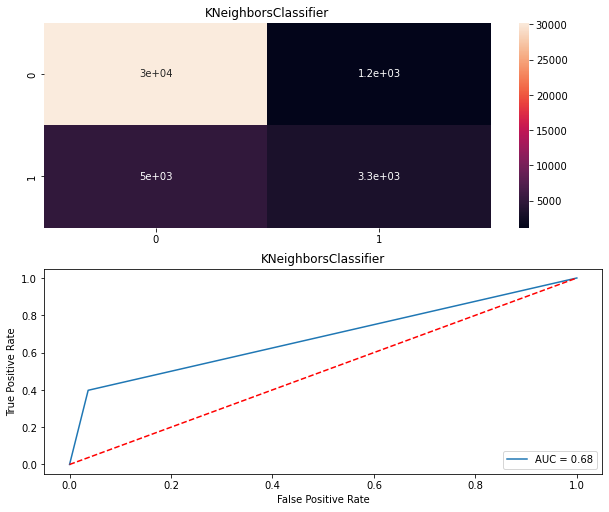

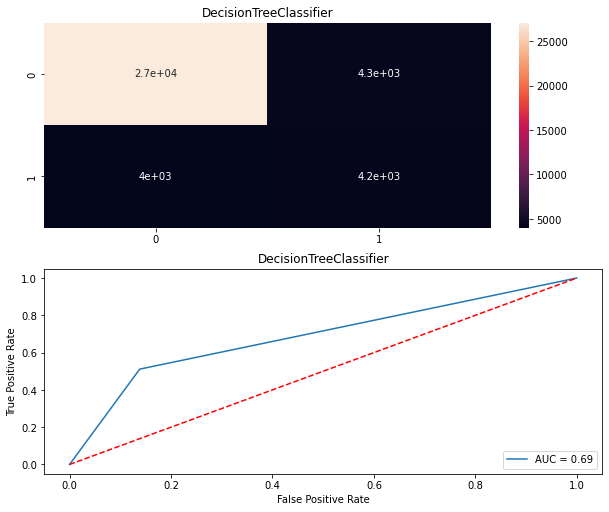

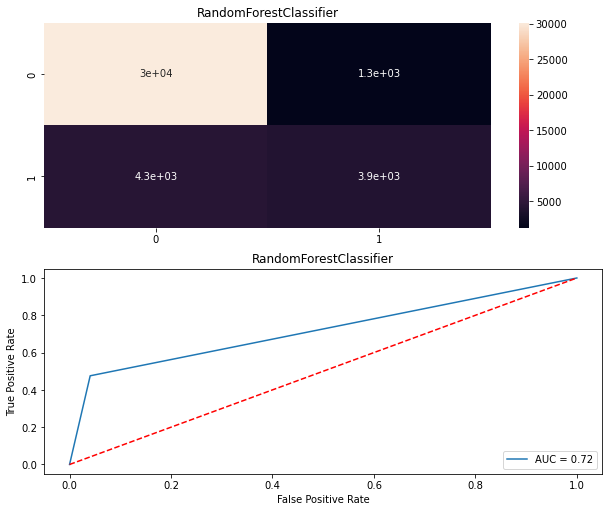

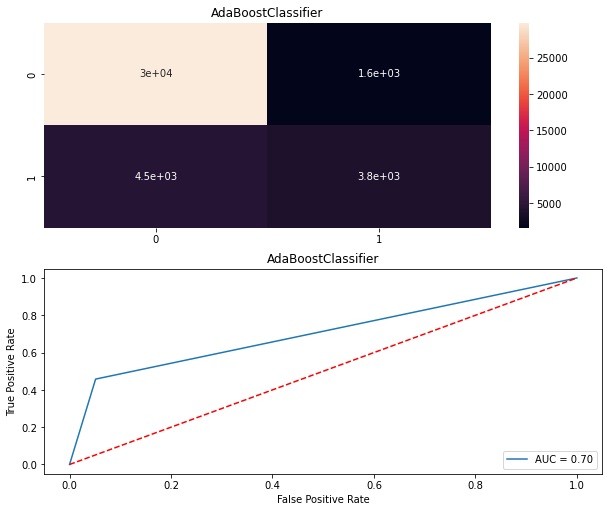

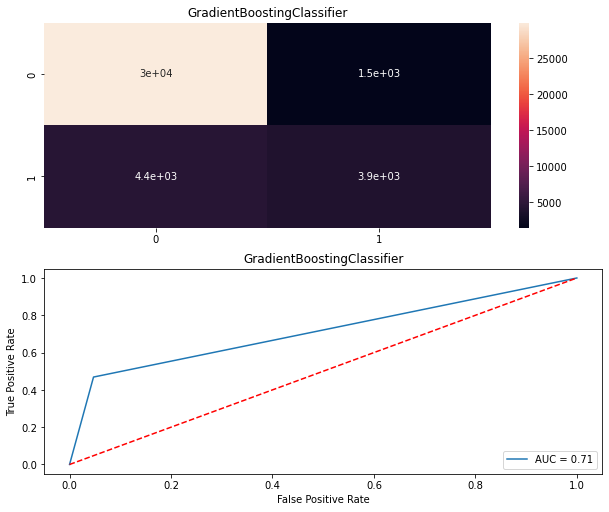

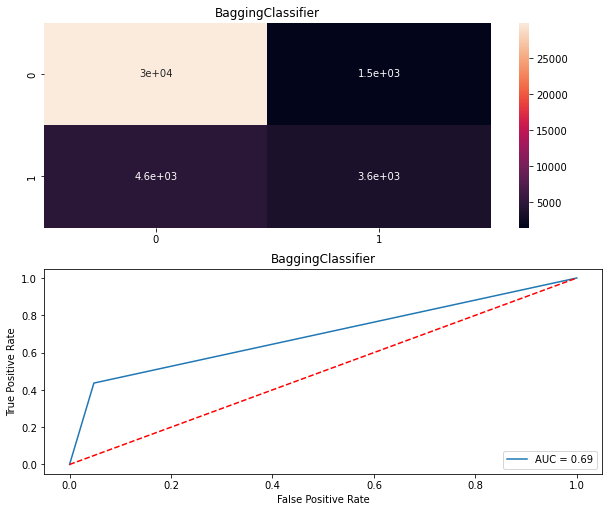

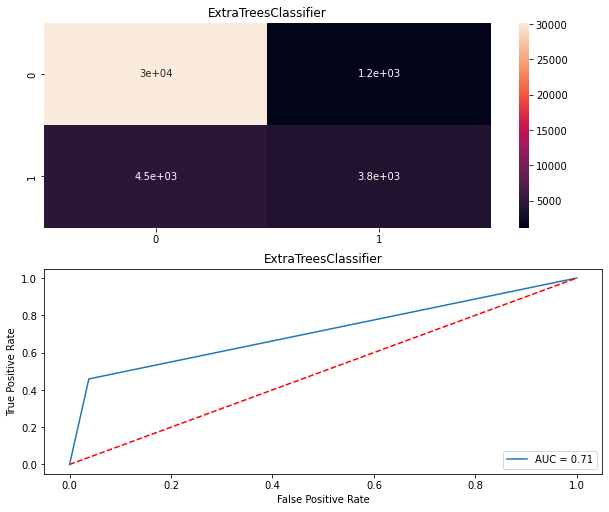

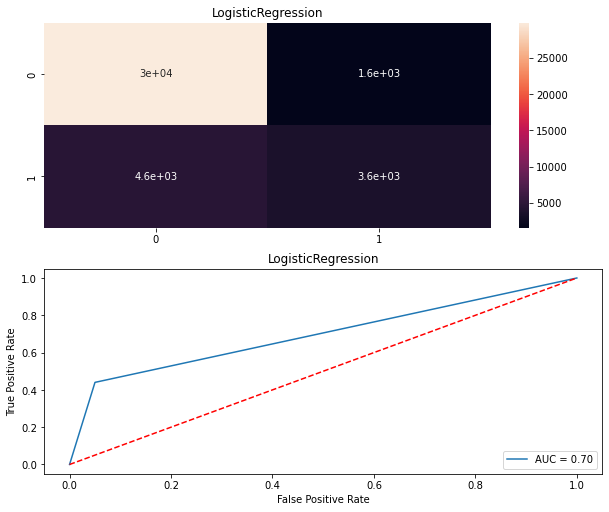

In [141]:
for name,model in models:
    model.fit(x_train,y_train)
    pre=model.predict(x_test)

    false_positive_rate, true_positive_rate,thresolds= roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    
    cm= confusion_matrix(y_test,pre)
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

# Hyper Tuning Parameter

In [142]:
from sklearn.model_selection import GridSearchCV

fmod_param = {'base_score':[0.5,1,1.5,2], 'colsample_bylevel':[1,1.25,1.5,2],'colsample_bytree':[1,2,3],
       'gamma':[0,1,2,3], 'learning_rate':[0.1,0.5,1,1.5,2]}
             
GSCV = GridSearchCV(XGBClassifier(), fmod_param, cv=5)
GSCV.fit(x_train,y_train)
GSCV.best_params_

{'base_score': 0.5,
 'colsample_bylevel': 1,
 'colsample_bytree': 1,
 'gamma': 3,
 'learning_rate': 0.1}

In [143]:
Final_model=XGBClassifier(base_score=0.5,colsample_bylevel=1,colsample_bytree= 1,gamma= 3,learning_rate= 0.1)

In [144]:
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
print(accuracy_score(y_test,pred)*100)

85.86446831039177


AxesSubplot(0.125,0.808774;0.62x0.0712264)





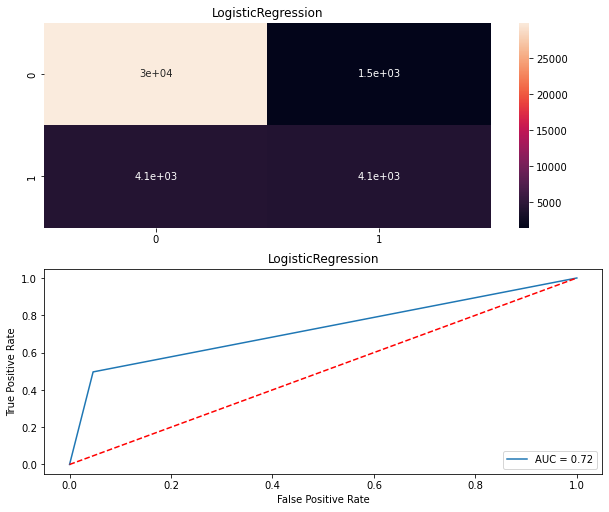

In [145]:
Final_model.fit(x_train,y_train)
pre=Final_model.predict(x_test)

false_positive_rate, true_positive_rate,thresolds= roc_curve(y_test,pre)
roc_auc=auc(false_positive_rate,true_positive_rate)

cm= confusion_matrix(y_test,pre)
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title(name)
print(sns.heatmap(cm,annot=True))
plt.subplot(912)
plt.title(name)
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print('\n\n')

In [146]:
import pickle
model_file_path='FinalModel_weather_data.pkl'
pickle.dump(Final_model, open(model_file_path, 'wb'))